In [4]:
import pandas as pd

sheet_id = "1n1F0Ah3SfzEdhU2spt0-rQp5TCvebNI4kjy-usNju2U"
url = f"https://docs.google.com/spreadsheets/d/{sheet_id}/gviz/tq?tqx=out:csv"

dados = pd.read_csv(url)
dados.head()

,Nível de renda,Motivação com o curso
0,D,3
1,D,6
2,D,7
3,D,2
4,D,0


### Hipóteses
$H_{NULA}$: A renda familiar do estudante não tem relação com sua motivação com o curso
$H_{PESQ}$ : A renda familiar do estudante tem relação com sua motivação com o curso

##### Calculando a relação entre renda e motivação do curso

In [5]:
def media(lista):
    return sum(lista)/len(lista)

def soma_desvios_quadrados(lista):
    soma = 0
    for i in lista:
        soma += (i - media(lista))**2
    return soma

def soma_desvios_quadrados_entre_grupos(df, coluna_score, coluna_grupo):
    soma = 0
    media_total = media(df[coluna_score])
    grupos = df[coluna_grupo].unique()

    for grupo in grupos:
        tamanho_grupo = len(df[df[coluna_grupo] == grupo])
        media_grupo = media(df[df[coluna_grupo] == grupo][coluna_score])

        soma += tamanho_grupo * (media_grupo - media_total)**2

    return soma

def quantidade_grupos(df, coluna_grupo):
    return len(df[coluna_grupo].unique())

In [8]:
coluna_score = "Motivação com o curso"
coluna_grupo = "Nível de renda"


ss_total = soma_desvios_quadrados(dados[coluna_score])
print(f'{ss_total = }')

ss_intra_aux = dados.pivot_table(index=coluna_grupo, values=coluna_score, aggfunc=soma_desvios_quadrados)
ss_intra = ss_intra_aux.sum().values[0]

display(ss_intra_aux)
print(f'{ss_intra = }')

ss_entre = soma_desvios_quadrados_entre_grupos(dados, coluna_score, coluna_grupo)
print(f'{ss_entre = }')

df_entre = quantidade_grupos(dados, coluna_grupo) - 1
df_intra = len(dados[coluna_score]) - quantidade_grupos(dados, coluna_grupo)

ms_intra = ss_intra / df_intra
ms_entre = ss_entre / df_entre

print(f'{df_intra = } {df_entre = }')
print(f'{ms_intra = } {ms_entre = }')

f = ms_entre / ms_intra
print(f'{f = }')

ss_total = 2284.95


,Motivação com o curso
Nível de renda,
A,475.2
B,82.0
C,62.0
D,33.2


ss_intra = 652.4
ss_entre = 1632.5500000000002
df_intra = 16 df_entre = 3
ms_intra = 40.775 ms_entre = 544.1833333333334
f = 13.34600449621909


## Analisando o valor F

para aceitar ou rejeitar a hipótese nula precisamos definir um valor critico para F, podemos
fazer isso olhando para os graus de liberdade do nosso modelo e comparando com a tabela a seguir:
<br>
<img src="/PUC-CDIA/Img/tabela_F_1.jpg" width="1200">
<br>
Assim, com os valores de 16 e 3, temos um F crítico de 3.24
Como o F calculado (13.34) é menor que o F crítico, rejeitamos a hipótese nula.
Indicando que a renda familia do estudante **tem** relação com sua motivação com o curso

Podemos verificar essa relação com um boxplot de cada grupo:

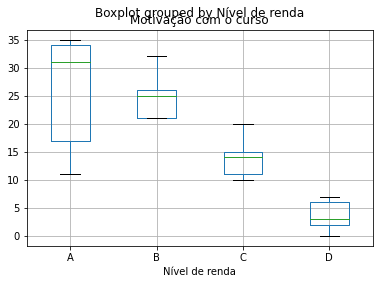

In [16]:
dados.boxplot(column=coluna_score, by=coluna_grupo);